<a href="https://colab.research.google.com/github/RaulRojas14021701/Problemas_Temas/blob/master/Copia_de_Ejemplos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Optimización con scipy

In [ ]:
%matplotlib inline

In [ ]:
import numpy as np
import scipy.optimize as opt
import matplotlib.pyplot as plt

## Ejemplo 1.

Consideremos el siguiente programa:

Maximizar: $12y \sqrt{x^3}$, sujeta a la restricción: $x + y = 15$

In [ ]:
def f(x):
    return (12.0*x[1]*np.sqrt(x[0]**(3)))

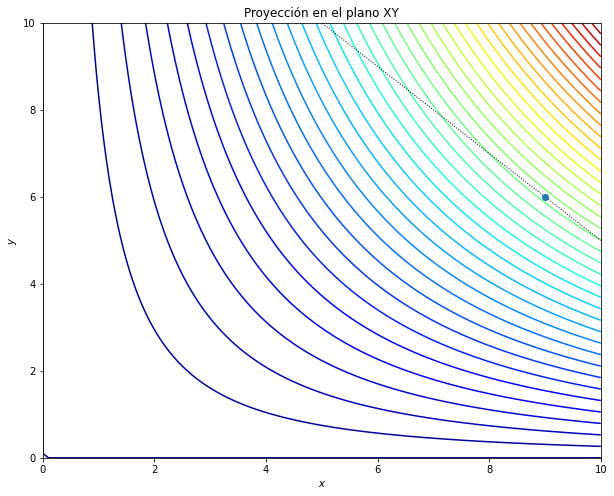

In [ ]:
x = np.linspace(0, 10, 100)
y = np.linspace(0, 10, 100)
X, Y = np.meshgrid(x, y)
Z = f(np.vstack([X.ravel(), Y.ravel()])).reshape((100,100))
plt.figure(figsize=(10,8))
plt.contour(X, Y, Z, np.arange(0,4000, 100.0), cmap='jet');
plt.plot(x, 15-x, 'k:', linewidth=1)
plt.xlabel('$x$'); plt.ylabel('$y$');
plt.title("Proyección en el plano XY")
plt.axis([0.0,10.0,0.0,10.0])
plt.plot(9,6,"o")

In [ ]:
cons = ({'type': 'eq',
         'fun' : lambda x: np.array([x[0] + x[1]-15.0])})#,
         #'jac' : lambda x: np.array([1.0, 2.0*x[1]])})

bnds = ((0.0, 10.0), (0.0, 10.0))

In [ ]:
x0 = [0.0, 10.0]

In [ ]:
ux = opt.minimize(f, x0, constraints=cons)
ux

<ipython-input-8-51b0944d9f31>:2: RuntimeWarning: invalid value encountered in double_scalars
  return (12*x[1]*x[0]**(3/2))


 message: Iteration limit reached
 success: False
  status: 9
     fun: nan
       x: [       nan        nan]
     nit: 100
     jac: [       nan        nan]
    nfev: 1119
    njev: 100

In [ ]:
cx = opt.minimize(f, x0, bounds=bnds, constraints=cons)
cx

 message: Optimization terminated successfully
 success: True
  status: 0
     fun: -1943.9999999999973
       x: [ 9.000e+00  6.000e+00]
     nit: 7
     jac: [-3.240e+02 -3.240e+02]
    nfev: 21
    njev: 7

Trazar los puntos críticos sobre la gráfica.

Maximizar $z=x^2 y$ restringido a $120x^2+320xy-500=0$

In [ ]:
def g(x):
    return (-1.0)*(x[1]*x[0]**2)

(0.0, 10.0, 0.0, 10.0)

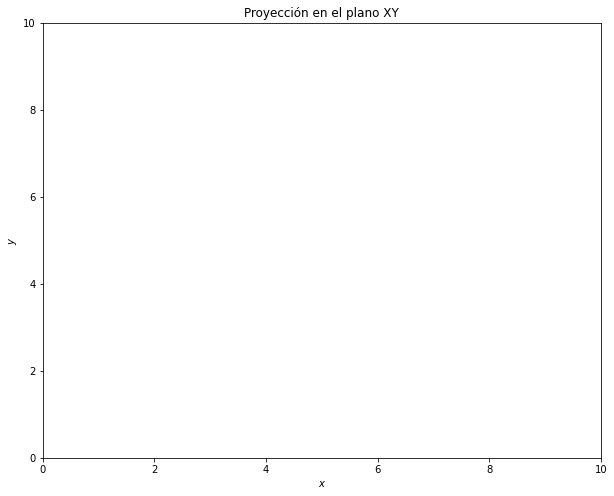

In [ ]:
x = np.linspace(0, 10, 100)
y = np.linspace(0, 10, 100)
X, Y = np.meshgrid(x, y)
Z = g(np.vstack([X.ravel(), Y.ravel()])).reshape((100,100))
plt.figure(figsize=(10,8))
plt.contour(X, Y, Z, np.arange(0,4000, 100.0), cmap='jet');

plt.xlabel('$x$'); plt.ylabel('$y$');
plt.title("Proyección en el plano XY")
plt.axis([0.0,10.0,0.0,10.0])


In [ ]:
cons = ({'type': 'eq',
         'fun' : lambda x: np.array([120.0*x[0]**2 + 320.0*x[1]*x[0]-500.0])})#,
         #'jac' : lambda x: np.array([1.0, 2.0*x[1]])})

bnds = ((0.0, 10.0), (0.0, 10.0))

In [ ]:
x0 = [0.0, 10.0]

In [ ]:
cx = opt.minimize(g, x0, bounds=bnds, constraints=cons)
cx

 message: Optimization terminated successfully
 success: True
  status: 0
     fun: -1.2276159395467956
       x: [ 1.179e+00  8.839e-01]
     nit: 22
     jac: [-2.083e+00 -1.389e+00]
    nfev: 79
    njev: 22

In [ ]:
def h(x):
    return (-1.0)*(np.sqrt(x[1])*x[0])

In [ ]:
cons = ({'type': 'eq',
         'fun' : lambda x: np.array([120.0*x[1] + 320.0*x[0]-500.0])})#,
         #'jac' : lambda x: np.array([1.0, 2.0*x[1]])})

bnds = ((0.0, 2.0), (0.0, 2.0))

In [ ]:
x0 = [0.0,2.0]

In [ ]:
cx = opt.minimize(h, x0, bounds=bnds, constraints=cons)
cx

 message: Optimization terminated successfully
 success: True
  status: 0
     fun: -1.2276159386407115
       x: [ 1.042e+00  1.389e+00]
     nit: 6
     jac: [-1.179e+00 -4.419e-01]
    nfev: 18
    njev: 6

## Ejemplo 2.

Optimizar la función:
$$-(2xy+2x-x^2-2y^2)$$
sujeta a las restricciones:
$$x^3-y=0$$
$$y-(x-1)^4-2 \geq 0$$
$$0.5 \geq x \geq 1.5$$
$$1.5 \geq y \geq 2.5$$

In [ ]:
def f(x):
    return -(2*x[0]*x[1] + 2*x[0] - x[0]**2 - 2*x[1]**2)

(0.0, 3.0, 0.0, 3.0)

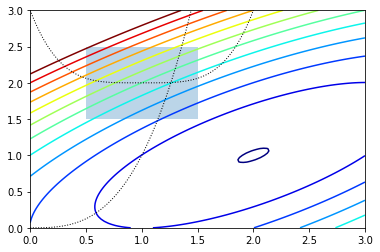

In [ ]:
x = np.linspace(0, 3, 100)
y = np.linspace(0, 3, 100)
X, Y = np.meshgrid(x, y)
Z = f(np.vstack([X.ravel(), Y.ravel()])).reshape((100,100))
plt.contour(X, Y, Z, np.arange(-1.99,10, 1), cmap='jet');
plt.plot(x, x**3, 'k:', linewidth=1)
plt.plot(x, (x-1)**4+2, 'k:', linewidth=1)
plt.fill([0.5,0.5,1.5,1.5], [2.5,1.5,1.5,2.5], alpha=0.3)
plt.axis([0,3,0,3])

In [ ]:
cons = ({'type': 'eq',
         'fun' : lambda x: np.array([x[0]**3 - x[1]]),
         'jac' : lambda x: np.array([3.0*(x[0]**2.0), -1.0])},
        {'type': 'ineq',
         'fun' : lambda x: np.array([x[1] - (x[0]-1)**4 - 2])})

bnds = ((0.5, 1.5), (1.5, 2.5))

In [ ]:
x0 = [0, 2.5]

No resdtringida

In [ ]:
ux = opt.minimize(f, x0, constraints=None)
ux

      fun: -1.9999999999996365
 hess_inv: array([[0.99829115, 0.50105608],
       [0.50105608, 0.4993548 ]])
      jac: array([ 1.25169754e-06, -1.41561031e-06])
  message: 'Optimization terminated successfully.'
     nfev: 18
      nit: 5
     njev: 6
   status: 0
  success: True
        x: array([2.00000043, 0.99999985])

Con restricciones

In [ ]:
cx = opt.minimize(f, x0, bounds=bnds, constraints=cons)
cx

     fun: 2.049915472024102
     jac: array([-3.48747933,  5.49674535])
 message: 'Optimization terminated successfully'
    nfev: 19
     nit: 6
    njev: 6
  status: 0
 success: True
       x: array([1.26089314, 2.00463288])

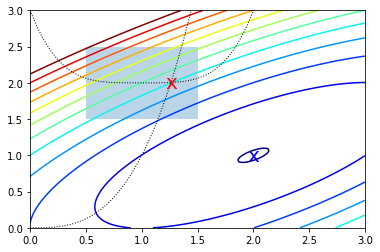

In [ ]:
x = np.linspace(0, 3, 100)
y = np.linspace(0, 3, 100)
X, Y = np.meshgrid(x, y)
Z = f(np.vstack([X.ravel(), Y.ravel()])).reshape((100,100))
plt.contour(X, Y, Z, np.arange(-1.99,10, 1), cmap='jet');
plt.plot(x, x**3, 'k:', linewidth=1)
plt.plot(x, (x-1)**4+2, 'k:', linewidth=1)
plt.text(ux['x'][0], ux['x'][1], 'x', va='center', ha='center', size=20, color='blue')
plt.text(cx['x'][0], cx['x'][1], 'x', va='center', ha='center', size=20, color='red')
plt.fill([0.5,0.5,1.5,1.5], [2.5,1.5,1.5,2.5], alpha=0.3)
plt.axis([0,3,0,3]);